## Homework 1:

1- Build a Keras Model for linear regression (check: https://keras.io/activations/). Use Boston Housing Dataset to train and test your model

2- Build a Keras Model for logistic regression. Use diabetes.csv to train and test

Comments:

1- Build the **simplest model** for linear regression with Keras and compare your model performance with `from sklearn.linear_model import LinearRegression`

2- Build the **simplest model** for logistic regression with Keras and compare your model performance with `from sklearn.linear_model import LogisticRegression`

3- **Add more complexity to your models in (1) and (2)** and compare with previous results

## Imports

In [23]:
# Keras imports
import tensorflow.keras as K
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
# import the data, and function to split it
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split
# the models from sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
# metrics for evaluating regression and classification from sklearn
from sklearn.metrics import mean_squared_error, confusion_matrix
# Pandas and Numpy for data analysis, mathematical computation
import pandas as pd
import numpy as np
# Classes used for Optimization
from sklearn.preprocessing import StandardScaler
from keras.layers.normalization import BatchNormalization
# Time the Training Process
import time
# Visualizing Results
import matplotlib.pyplot as plt
import seaborn as sns

## 1 - Linear Regression in Keras (Boston Dataset)

In [24]:
# store the Boston data in variables
boston = load_boston()
boston_X, boston_y = boston.data, boston.target

# split the data
x_train, x_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.3, random_state=0)

# remind ourselves about the details of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Implemenation of the Deep Learning Model

In [29]:
# using the Functional API
inp = Input(shape=(13,))
# Output layer - one output neuron, and activation function is linear
out = Dense(1, activation='linear')(inp)
dl_linreg = Model(inputs=inp, outputs=out)
# The loss function should be mse or mae
dl_linreg.compile(optimizer='adam', loss='mse', metrics=["mean_squared_error"])
dl_linreg.fit(x_train, y_train, epochs=100, batch_size=1, verbose=0);
loss, error = dl_linreg.evaluate(x_test, y_test, verbose=0)
print("MSE = {:.2f}".format(error))

MSE = 34.89


In [30]:
# Instantiation and Training
ml_linreg = LinearRegression().fit(x_train, y_train)
# Testing and Evaluating the Model
y_pred = ml_linreg.predict(x_test)
error = round(mean_squared_error(y_test, y_pred), 2)
print(f"MSE: {error}")

MSE: 27.2


**Conclusion: Keras vs. Scikit-Learn for Regression?**

As you can see above, the linear regression model implemented in Keras scored a greater error than the one implemented in Scikit-learn. However, I will confess that the Keras model also has a lot more *variance* than the Scikit-learn model. The result you see from cell 32 above is only the result after I ran the cell multiple times. Sometimes the MSE from the Keras model was lower than from Scikit-learn; and other times it was not, in a seemingly random pattern.

## 2 - Logistic Regression in Keras (Diabetes Dataset)

In [31]:
# store the diabetes data in variables
pima = pd.read_csv('diabetes.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix, access the features we want in feature_cols
diabetes_X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
diabetes_y = pima['Outcome']

# split the data
x_train, x_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.3, random_state=0)

# remind ourselves about the details of the dataset
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Implementation in Keras

In [32]:
# Keras Sequential API
dl_logreg = Sequential()
# in binary classification, the activation function is sigmoidal
dl_logreg.add(Dense(1, input_shape=(4,), activation='sigmoid'))
# the loss function is binary_crossentropy
dl_logreg.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy"])
dl_logreg.fit(x_train, y_train, epochs=25, batch_size=1, verbose=0);
loss, accuracy = dl_logreg.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy = {round(accuracy*100, 2)}%")

Accuracy = 67.97%


### Compared to SciKit-Learn

In [33]:
# Instantiating and Training the Model
ml_logreg = LogisticRegression().fit(x_train, y_train)
# Testing the Model
y_pred = ml_logreg.predict(x_test)
# Evaluating Model Accuracy
confusion = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion.ravel()
accuracy = round(TP + TN / len(y_pred), 2)
print(f'Accuracy: {accuracy}%')

Accuracy: 21.6%


**Final Conclusion: Keras vs. Scikit-Learn for Classification?**

As you can see above, the Keras logistic regression model achieved a higher accuracy percentage for the task of classifying subjects in the Pima Indians Diabetes dataset, as opposed to the one implemented using scikit-learn. Additionally, this value is stable; the Keras model's accuracy appeared not to change after multiple executions of the cell.

The difference in the two accuracies may be that the Scikit-learn implementation is unable to account for the unbalancd of the two classes in this dataset. Therefore it operates with an improper threshold, whereas the Keras model is better at learning to adjust to this threshold.

## 3 - Improving Results

### Improving the Sklearn Regression model (Standard Scaling)

In [11]:
def scale_data(X, y, scaler):
    """Scales the X and y variables of the dataset, using Standard Scaling. 
       Returns scaled form of data needed to make the ML/DL model.

    """
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    # scale the training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

# normalizing Boston data to a Z-distribution
standard_scaler = StandardScaler()
X_train_scaled, X_test_scaled, y_train, y_test = scale_data(boston_X, boston_y, standard_scaler)

Fitting Time: 0.0009148120880126953 miliseconds

Y-intercept of Regression Line: 22.6087071240106 

Weight values of Regression Line: 
[-0.97100092  1.04667838 -0.04044753  0.59408776 -1.80876877  2.60991991
 -0.19823317 -3.00216551  2.08021582 -1.93289037 -2.15743759  0.75199122
 -3.59027047]


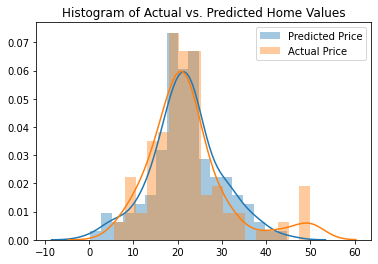

MSE: 29.78


In [12]:
def train_test_model(model, x_train, y_train):
    """
    End to end process of fitting a supervised machine learning model.
    Provides information such as time taken for training, intercepts and coefficients.
    
    """
    def time_fitting(fitter):
        '''Record and display the time taken to train the model.'''
        start = time.time()
        fitter()
        end = time.time()
        print(f'Fitting Time: {end-start} miliseconds')
        return None

    # fit the model and time it
    time_fitting(lambda: model.fit(x_train, y_train))
    print()
    # print intercept and coefficients
    print(f'Y-intercept of Regression Line: {model.intercept_} \n')
    print(f'Weight values of Regression Line: \n{model.coef_}')
    return model

def prediction_vs_actual(model, X_test, y_test):  
    """Plots a histogram to visualize model accuracy. Prints the MSE."""
    y_pred = model.predict(X_test)
    sns.distplot(y_pred, hist=True, kde=True, bins=18, label='Predicted Price')
    sns.distplot(y_test, hist=True, kde=True, bins=18, label='Actual Price')
    plt.legend()
    plt.title('Histogram of Actual vs. Predicted Home Values')
    plt.show()
    error = round(mean_squared_error(y_test, y_pred), 2)
    print(f"MSE: {error}")
    return y_pred

# making a new and improved Linear Regression model
scaled_ml_linreg = LinearRegression()
scaled_ml_linreg = train_test_model(scaled_ml_linreg, X_train_scaled, y_train)
y_pred = prediction_vs_actual(scaled_ml_linreg, X_test_scaled, y_test)

### Improving the Keras Regression model (using Dropout and Batch Normalization)

In [13]:
# Adding layers using the Sequential API
dl_linreg_opt = Sequential()
dl_linreg_opt.add(Dense(64, activation='sigmoid'))
dl_linreg_opt.add(BatchNormalization())
dl_linreg_opt.add(Dropout(0.2))
dl_linreg_opt.add(Dense(1, activation='linear'))
# the data has already been scaled above, so we move to testing
dl_linreg.compile(optimizer='adam', loss='mse', metrics=["mean_squared_error"])
dl_linreg.fit(X_train_scaled, y_train, epochs=100, batch_size=1, verbose=0);
loss, error = dl_linreg.evaluate(X_test_scaled, y_test, verbose=0)
print("MSE = {:.2f}".format(error))

MSE = 32.71


**Final Conclusion: Did the Regression models improve?**

As you can see above, using standard scaling on the LinearRegression model from Sckit-learn did not noticeably decrease the error in the model predictions (for some reason, it looks as though error slightly increased from before).

On the other hand, the Keras implementation of the regression cut its error almost in half! The difference in the optimized implementation can be attributed to the use of data normalization, batch normalization, and a dropout of 20% being added to the model.

### Improving the Sklearn Classification model (Standard Scaling + Threshold)

In [14]:
# Checking to See if Output Classes in Diabetes Dataset are Balanced
diabetes_y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Conclusion**: these classes are *definitely* unbalanced!

In [15]:
def calculate_accuracy(X_test, y_test, model):
    """Print the accuracy of the Logisitic Regression model, by making predictions 
       based on the adjusted threshold.

    """
    # Calculating the Accuracy using the Adjusted Threshold
    threshold = y_train.value_counts()[1] / len(y_train)
    # Generate a List of Label Predictions
    y_pred_prob = model.predict_proba(X_test)
    y_pred = list()
    for pred in y_pred_prob:
        if pred[0] < threshold:
            y_pred.append(0)
        else:
            y_pred.append(1)
    # Calculate Accuracy
    confusion = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = confusion.ravel()
    accuracy = round(TP + TN / len(y_pred), 2)
    print(f'Accuracy: {accuracy}%')
    return None
   
# scaling the diabetes data
X_train_scaled, X_test_scaled, y_train, y_test = scale_data(diabetes_X, diabetes_y, standard_scaler)
# remake the LogisticRegression model
scaled_ml_logreg = LogisticRegression()
scaled_ml_logreg = train_test_model(scaled_ml_logreg, X_train_scaled, y_train)
# Evaluation of the Model
calculate_accuracy(X_test_scaled, y_test, scaled_ml_logreg)

Fitting Time: 0.0037369728088378906 miliseconds

Y-intercept of Regression Line: [-0.72576435] 

Weight values of Regression Line: 
[[0.2237684  0.23928277 0.79978507 0.47750585]]
Accuracy: 50.03%


### Improving the Keras Classification model (hidden layers)

In [16]:
# Keras Sequential API
dl_logreg_opt = Sequential()
# in binary classification, the activation function is sigmoidal
dl_logreg_opt.add(Dense(1, input_shape=(4,), activation='sigmoid'))
dl_logreg_opt.add(Dense(1, activation='sigmoid'))
# Adding Batch Normalization
dl_logreg_opt.add(BatchNormalization())
# the loss function is binary_crossentropy
dl_logreg_opt.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
dl_logreg_opt.fit(X_train_scaled, y_train, epochs=100, batch_size=1, verbose=0);
loss, accuracy = dl_logreg_opt.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Accuracy = {accuracy*100}%")

Accuracy = 67.70833333333334%


**Final Conclusion: Did the Classfication models improve?**

As you can see above, the Logistic Regression model from Scikit-learn improved drastically from before, rising from an accuracy around 20% to approximately 50%. This may be attributed to normalizing data to a Z-distribution, as well as adjusting the threshold value to accurately reflect the ratio of positive to negative output samples in the dataset.

On the other hand, the Keras implementation of this model was roughly the same, from being around 21% to approximately 19%. The cause of this loss is currently unclear. The changes made to the model in the second implementation was the use of batch normalization, as well as data normalization.